In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels
import sklearn

In [2]:
pdac_a_indrop = pd.read_csv('data/pdac/GSE111672/suppl/GSE111672_PDAC-A-indrop-filtered-expMat.txt', sep='\t', index_col=0)
pdac_b_indrop = pd.read_csv('data/pdac/GSE111672/suppl/GSE111672_PDAC-B-indrop-filtered-expMat.txt', sep='\t', index_col=0)

In [3]:
cells_a = pdac_a_indrop.columns.to_series()
cells_b = pdac_b_indrop.columns.to_series()

In [4]:
def get_cells(pdac_indrop):
    cells = pdac_indrop.columns.to_series()
    cells = cells.reset_index(drop=True)
    cells = cells.str.split(".", expand=True)
    
    return cells

In [5]:
cells_a = get_cells(pdac_a_indrop)
cells_b = get_cells(pdac_b_indrop)

In [6]:
cells_a[0].value_counts()

Ductal - CRISP3 high/centroacinar like    529
Ductal - terminal ductal like             350
Ductal - MHC Class II                     287
Ductal - APOL1 high/hypoxic               215
Cancer clone B                            170
Cancer clone A                            126
T cells & NK cells                         40
mDCs B                                     33
Tuft cells                                 32
Macrophages A                              21
Macrophages B                              19
Monocytes                                  18
RBCs                                       15
Mast cells                                 14
Acinar cells                               13
pDCs                                       13
mDCs A                                     12
Endothelial cells                          11
Fibroblasts                                 5
Endocrine cells                             3
Name: 0, dtype: int64

In [7]:
cells_b[0].value_counts()

Ductal - terminal ductal like             736
Cancer clone A                            339
Ductal - MHC Class II                     211
Endothelial cells                         159
Ductal - CRISP3 high/centroacinar like    152
Tuft cells                                 37
mDCs                                       35
Monocytes                                  20
Endocrine cells                            13
Mast cells                                 13
Macrophages                                 9
Acinar cells                                6
RBCs                                        3
Name: 0, dtype: int64

In [8]:
pdac_a_st = pd.read_csv('data/pdac/GSE111672/st/GSM3036911/GSM3036911_PDAC-A-ST1-filtered.txt', sep='\t', index_col=0)
pdac_b_st = pd.read_csv('data/pdac/GSE111672/st/GSM3405534/GSM3405534_PDAC-B-ST1-filtered.txt', sep='\t', index_col=0)

In [9]:
normalize_cpm = lambda x: np.log1p(x * 1e6 / x.sum())
pdac_a_st = pdac_a_st.apply(normalize_cpm, axis=0)
pdac_b_st = pdac_b_st.apply(normalize_cpm, axis=0)


In [23]:
coords_a = pdac_a_st.columns.to_series().str.split("x", expand=True).astype(int)
coords_b = pdac_b_st.columns.to_series().str.split("x", expand=True).astype(int)
coords_a["cluster"] = pd.array([None] * len(coords_a), dtype="Int64")
coords_b["cluster"] = pd.array([None] * len(coords_b), dtype="Int64")
coords_a["cluster"].dtype

Int64Dtype()

In [29]:
cluster_assignments = [
    "Cancer region",
    "Pancreatic tissue",
    "Interstitium",
    "Duct epithelium",
    "Stroma",
]
cluster_to_ordinal = {c: i for i, c in enumerate(cluster_assignments)}
cluster_to_rgb = {
    "Cancer region": "#686868",
    "Pancreatic tissue": "#7670b0",
    "Interstitium": "#8dccc2",
    "Duct epithelium": "#e42a89",
    "Stroma": "#169c78",
}
pd.Series(cluster_to_ordinal)

Cancer region        0
Pancreatic tissue    1
Interstitium         2
Duct epithelium      3
Stroma               4
dtype: int64

In [38]:
coords_a.loc["10x10", "cluster"] = 3
coords_a.loc["10x13", "cluster"] = 3
coords_a.loc["10x14", "cluster"] = 3
coords_a.loc["10x15", "cluster"] = 3
coords_a.loc["10x16", "cluster"] = 3
coords_a.loc["10x17", "cluster"] = 3
coords_a.loc["10x19", "cluster"] = 3
coords_a.loc["10x20", "cluster"] = 3
coords_a.loc["10x24", "cluster"] = 3
coords_a.loc["10x25", "cluster"] = 3
coords_a.loc["10x26", "cluster"] = 3
coords_a.loc["10x27", "cluster"] = 3
coords_a.loc["10x28", "cluster"] = 3
coords_a.loc["10x29", "cluster"] = 4
coords_a.loc["10x30", "cluster"] = 3
coords_a.loc["10x31", "cluster"] = 4
coords_a.loc["10x32", "cluster"] = 4
coords_a.loc["10x33", "cluster"] = 3


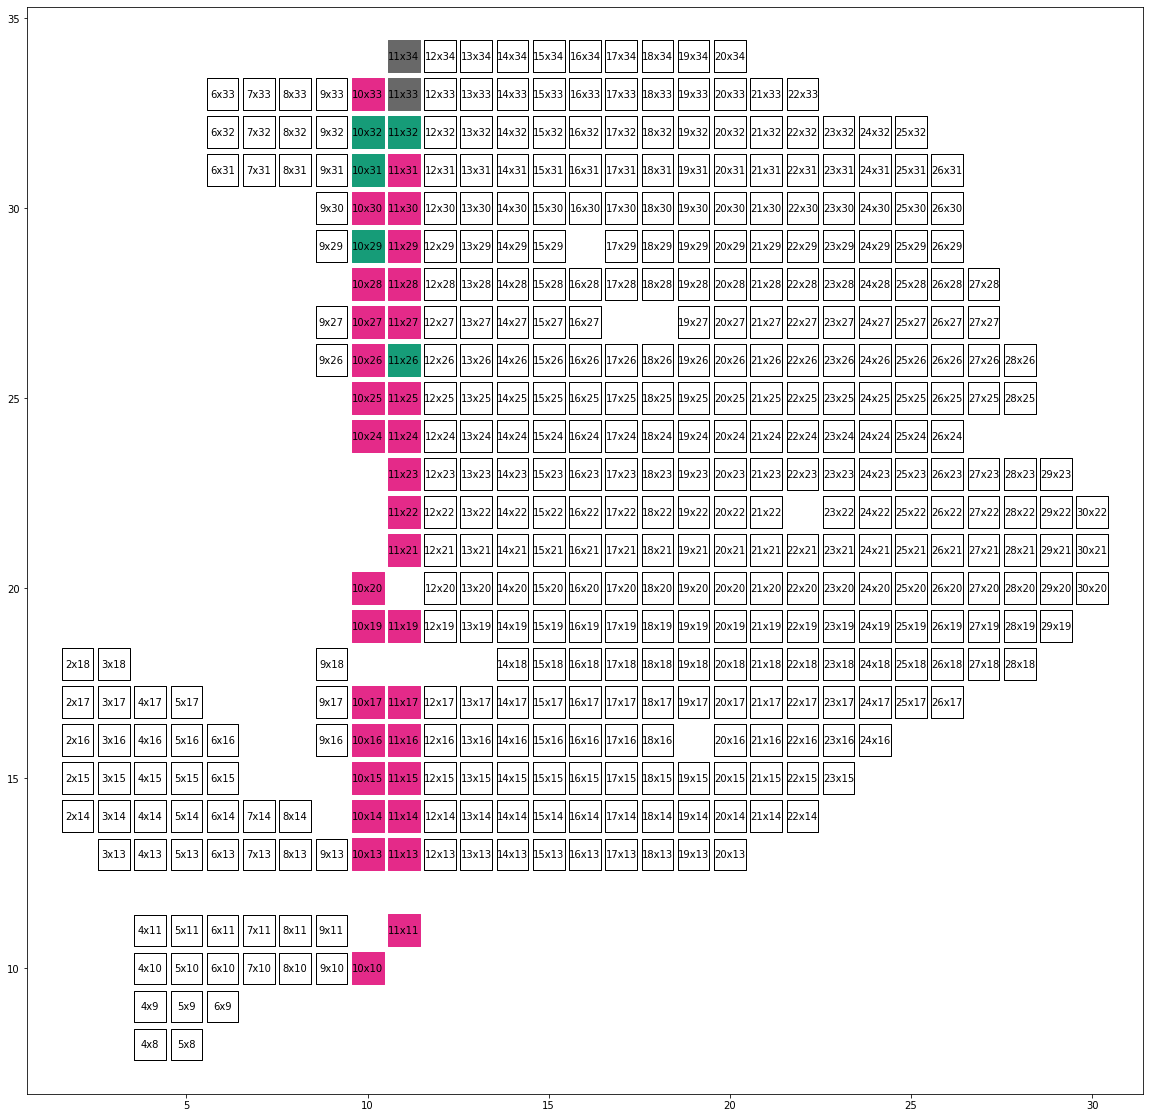

In [40]:

coords_a.loc["11x11", "cluster"] = 3
coords_a.loc["11x13", "cluster"] = 3
coords_a.loc["11x14", "cluster"] = 3
coords_a.loc["11x15", "cluster"] = 3
coords_a.loc["11x16", "cluster"] = 3
coords_a.loc["11x17", "cluster"] = 3
coords_a.loc["11x19", "cluster"] = 3
coords_a.loc["11x21", "cluster"] = 3
coords_a.loc["11x22", "cluster"] = 3
coords_a.loc["11x23", "cluster"] = 3
coords_a.loc["11x24", "cluster"] = 3
coords_a.loc["11x25", "cluster"] = 3
coords_a.loc["11x26", "cluster"] = 4
coords_a.loc["11x27", "cluster"] = 3
coords_a.loc["11x28", "cluster"] = 3
coords_a.loc["11x29", "cluster"] = 3
coords_a.loc["11x30", "cluster"] = 3
coords_a.loc["11x31", "cluster"] = 3
coords_a.loc["11x32", "cluster"] = 4
coords_a.loc["11x33", "cluster"] = 0
coords_a.loc["11x34", "cluster"] = 0
# coords_a.iloc[0:20]
fig, axs = plt.subplots(1,1, figsize=(20, 20))
for col_name, coords in coords_a.iterrows():
    if not pd.isna(coords["cluster"]):
        spot_colour = cluster_to_rgb[cluster_assignments[coords["cluster"]]]
        facecolor = spot_colour
    else:
        spot_colour = "k"
        facecolor = "none"
    axs.scatter(coords[0], coords[1], marker="s", s=1000,facecolors=facecolor, edgecolors=spot_colour)
    axs.text(coords[0], coords[1], col_name, ha="center", va="center")